#<center> EKE </center> #

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import csv
import sys
from scipy.interpolate import interp1d
from scipy import interpolate
from numba import autojit
from pylab import *
from matplotlib import gridspec
import netCDF4
sys.path.append('/noc/users/hb1g13/Python/python_functions/')
from useful import *
import SG as SG
import layers_calc_numba
from Flat_channel import *
from HB_Plot import nf, fmt
sys.path.append('/noc/users/hb1g13/Python/python_functions/MITgcmUtils/')
import utils
%matplotlib inline

In [2]:
# Some parameters
Full = 'N'  # 9 Pannels isn't ideal for presentations N option give 4 plots
Qplot = 'Y'

In [3]:
if Full == 'N':
    tau = ['3', '300', '3000', 'Closed']
elif Full == 'Extremes':
    tau = ['3','Closed']
else:
    tau = ['3', '10', '30', '100', '300',
           '1000', '3000', '10000', 'Closed']
Figletter = ['a) ','b) ','c) ','d) ','e)','f)','g)','h)','j)']
# Path root
x = '/noc/msm/scratch/students/hb1g13/Mobilis/Full'
# Now Make file structure
check = 0
runs = []
for i in range(len(tau)):
    flist = x+'/'+str(tau[i])+'/VSQ.nc'
    if not os.path.exists(flist):
        print ' WARNING: '+flist+' does not exist! (skipping this tau...)'
        check += 0
    else:
        check += 1
        runs.append(i)
Runs=np.array(runs)

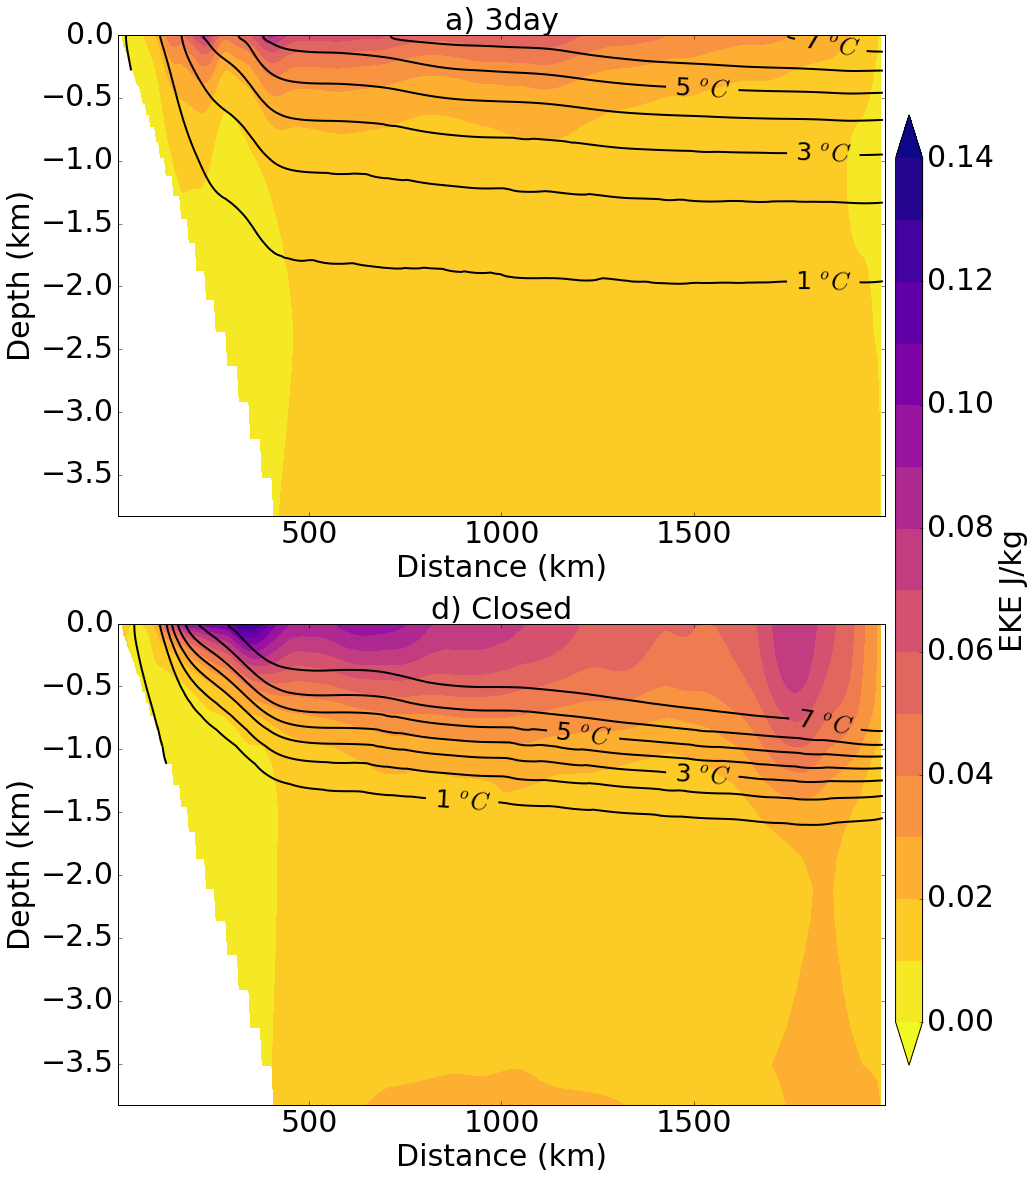

In [6]:
fig = plt.figure(figsize=(12.5, 16.5))
Psi_levs = np.arange(-0., .15, .01)
Psi_ticks =np.arange(-0., .15, .02)
for i in range(len(Runs)):
    fname = x+'/'+str(tau[Runs[i]]+'/')
    c = utils.ChannelSetup(output_dir=str(fname))
    # PLOT PANNELS
    EKE = c.calc_EKE()
    ax = fig.add_subplot(2, 1, i+1)
    Q2_levs = (np.arange(-1,8,1))
    p = ax.contourf(c.yc/1000, c.zc/1000,
                EKE, Psi_levs, cmap=plt.cm.plasma_r, extend='both')
    Tavlat = c.get_zonal_avg('Tav.nc','THETA',mask=c.HFacC)
    q = ax.contour(c.yc/1000, c.zc/1000, Tavlat, Q2_levs, colors='k', linewidths=2)
    q.levels = [nf(val) for val in q.levels]
    plt.clabel(q, q.levels[::2], inline=1, fmt=fmt, fontsize=25)
    ax.set_title(str(Figletter[Runs[i]])+str(tau[Runs[i]])+'day', fontsize=30)
    if str(tau[Runs[i]]) == 'Closed':
        ax.set_title(str(Figletter[Runs[i]])+str(tau[Runs[i]]), fontsize=30)
    ax.set_xlabel('Distance (km)', fontsize=30)
    ax.set_ylabel('Depth (km)', fontsize=30)
    ax.tick_params(axis='both', which='major', labelsize=30)
plt.tight_layout()
cax = fig.add_axes([1, 0.1, 0.03, 0.8])
cbar = fig.colorbar(p, cax=cax)
cbar.ax.set_ylabel('EKE J/kg', fontsize=30, )
cbar.ax.tick_params(labelsize=30)
 

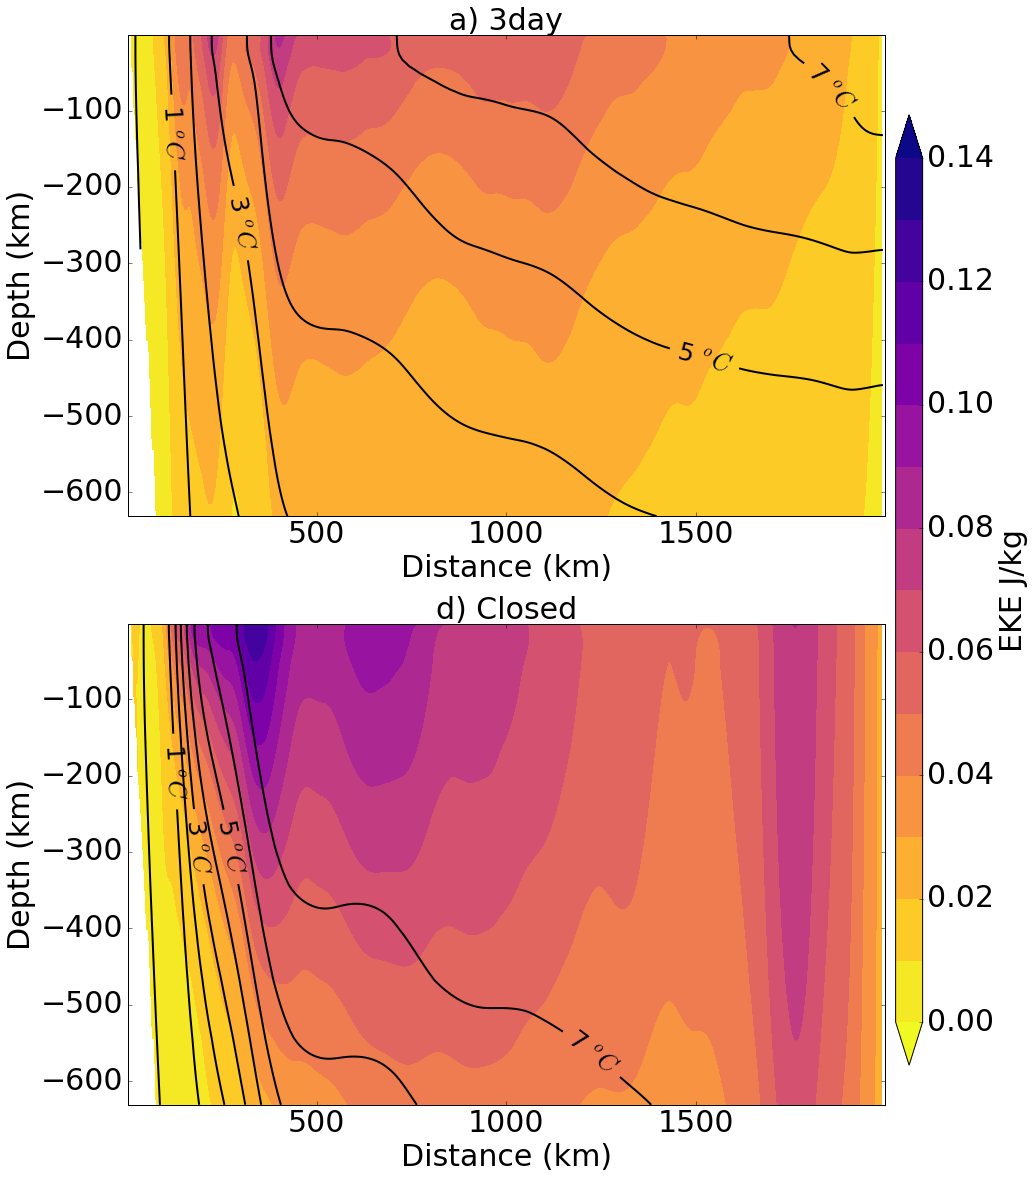

In [5]:
fig = plt.figure(figsize=(12.5, 16.5))
Psi_levs = np.arange(-0., .15, .01)
Psi_ticks =np.arange(-0., .15, .02)
for i in range(len(Runs)):
    fname = x+'/'+str(tau[Runs[i]]+'/')
    c = utils.ChannelSetup(output_dir=str(fname))
    # PLOT PANNELS
    EKE = c.calc_EKE()
    ax = fig.add_subplot(2, 1, i+1)
    Q2_levs = (np.arange(-1,8,1))
    p = ax.contourf(c.yc/1000, c.zc[0:25],
                EKE[0:25,:], Psi_levs,cmap=plt.cm.plasma_r, extend='both')
    Tavlat = c.get_zonal_avg('Tav.nc','THETA',mask=c.HFacC)
    q = ax.contour(c.yc/1000, c.zc[0:25], Tavlat[0:25,:], Q2_levs, colors='k', linewidths=2)
    q.levels = [nf(val) for val in q.levels]
    plt.clabel(q, q.levels[::2], inline=1, fmt=fmt, fontsize=25)
    ax.set_title(str(Figletter[Runs[i]])+str(tau[Runs[i]])+'day', fontsize=30)
    if str(tau[Runs[i]]) == 'Closed':
        ax.set_title(str(Figletter[Runs[i]])+str(tau[Runs[i]]), fontsize=30)
    ax.set_xlabel('Distance (km)', fontsize=30)
    ax.set_ylabel('Depth (km)', fontsize=30)
    ax.tick_params(axis='both', which='major', labelsize=30)
plt.tight_layout()
cax = fig.add_axes([1, 0.1, 0.03, 0.8])
cbar = fig.colorbar(p, cax=cax)
cbar.ax.set_ylabel('EKE J/kg', fontsize=30, )
cbar.ax.tick_params(labelsize=30)

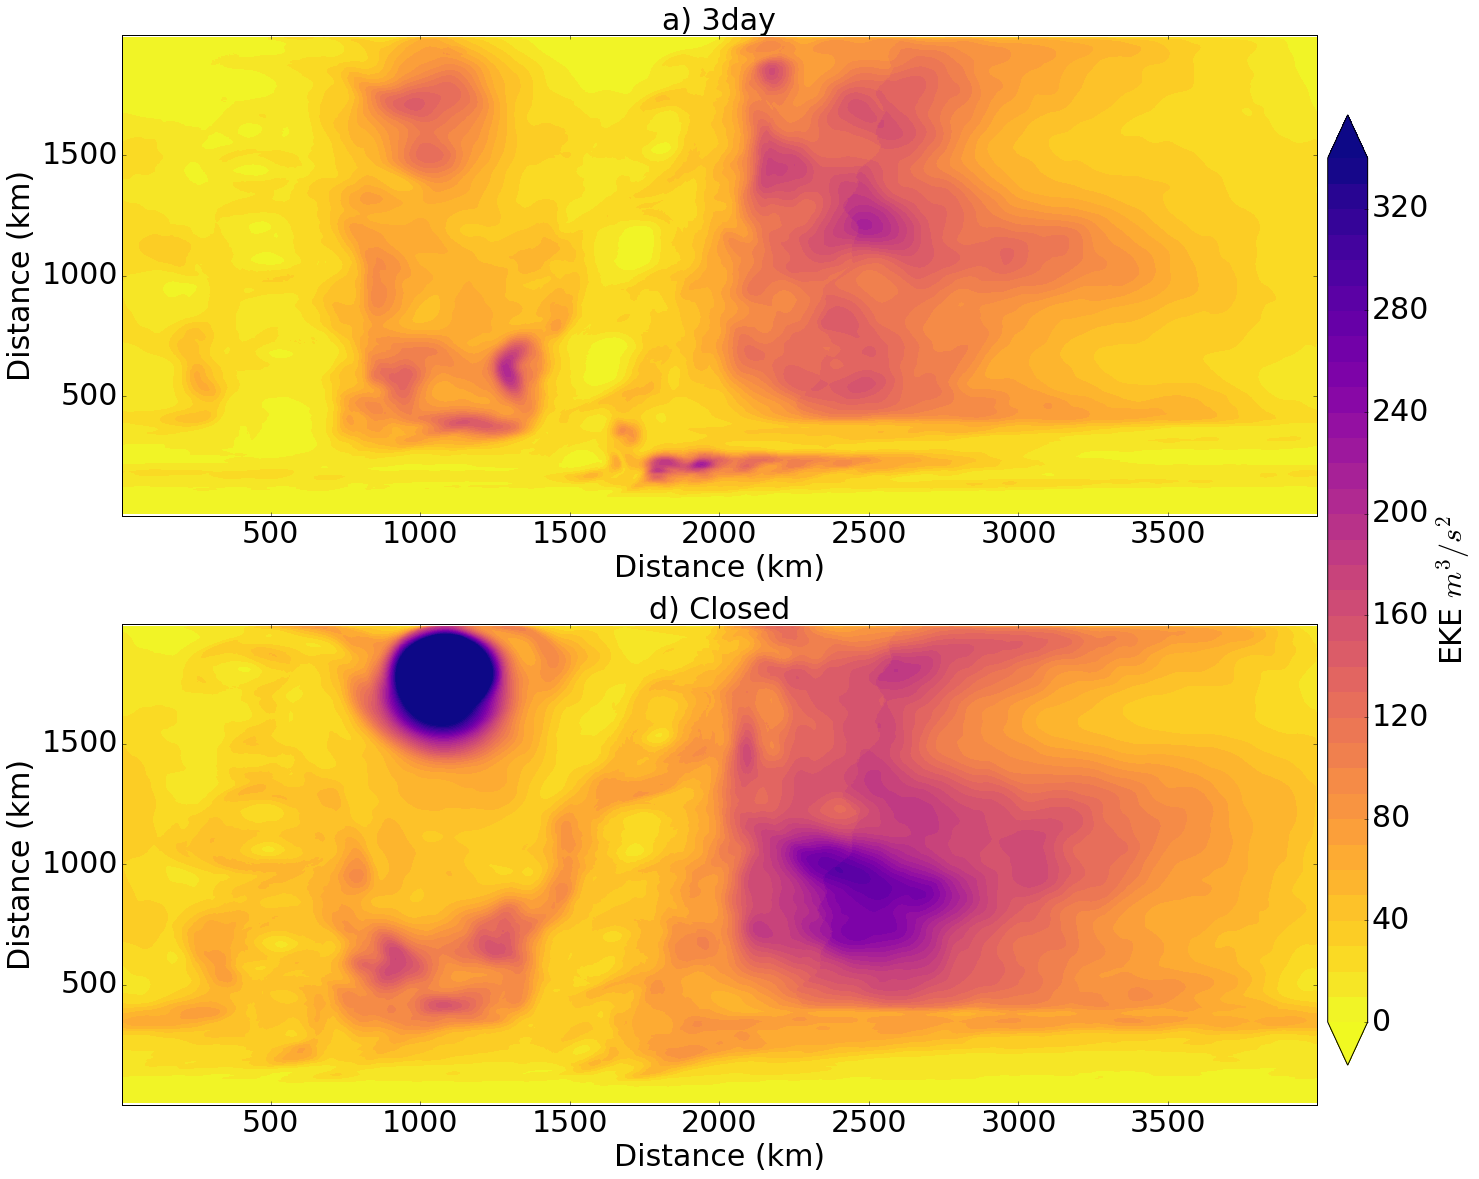

In [6]:
fig = plt.figure(figsize=(18.5, 16.5))
Psi_levs = np.arange(-0., 350, 10)
Psi_ticks =np.arange(-0., 350, 50)
for i in range(len(Runs)):
    fname = x+'/'+str(tau[Runs[i]]+'/')
    c = utils.ChannelSetup(output_dir=str(fname))
    # PLOT PANNELS
    EKE = c.calc_EKE_all()
    CellVol = np.tile(c.dzf,(c.Nx,c.Ny,1)).T*c.HFacC
    # depth integrate
    EKE_di = np.sum(EKE*CellVol,axis=0)
    ax = fig.add_subplot(2, 1, i+1)
    Q2_levs = (np.arange(-1,8,1))
    p = ax.contourf(c.xc/1000, c.yc/1000,
                EKE_di, Psi_levs,cmap=plt.cm.plasma_r, extend='both')


    ax.set_title(str(Figletter[Runs[i]])+str(tau[Runs[i]])+'day', fontsize=30)
    if str(tau[Runs[i]]) == 'Closed':
        ax.set_title(str(Figletter[Runs[i]])+str(tau[Runs[i]]), fontsize=30)
    ax.set_xlabel('Distance (km)', fontsize=30)
    ax.set_ylabel('Distance (km)', fontsize=30)
    ax.tick_params(axis='both', which='major', labelsize=30)
plt.tight_layout()
cax = fig.add_axes([1, 0.1, 0.03, 0.8])
cbar = fig.colorbar(p, cax=cax)
cbar.ax.set_ylabel(r'EKE $m^3/s^2$', fontsize=30, )
cbar.ax.tick_params(labelsize=30)

In [ ]:
fig = plt.figure(figsize=(18.5, 16.5))
Psi_levs = np.arange(-0., .3, .01)
Psi_ticks =np.arange(-0., .3, .02)
for i in range(len(Runs)):
    fname = x+'/'+str(tau[Runs[i]]+'/')
    c = utils.ChannelSetup(output_dir=str(fname))
    # PLOT PANNELS
    EKE = c.calc_EKE_all()
    ax = fig.add_subplot(2, 1, i+1)
    Q2_levs = (np.arange(-1,8,1))
    p = ax.contourf(c.xc/1000, c.yc/1000,
                EKE[0,:,:], Psi_levs, cmap=plt.cm.plasma_r, extend='both')


    ax.set_title(str(Figletter[Runs[i]])+str(tau[Runs[i]])+'day', fontsize=30)
    if str(tau[Runs[i]]) == 'Closed':
        ax.set_title(str(Figletter[Runs[i]])+str(tau[Runs[i]]), fontsize=30)
    ax.set_xlabel('Distance (km)', fontsize=30)
    ax.set_ylabel('Distance (km)', fontsize=30)
    ax.tick_params(axis='both', which='major', labelsize=30)
plt.tight_layout()
cax = fig.add_axes([1, 0.1, 0.03, 0.8])
cbar = fig.colorbar(p, cax=cax)
cbar.ax.set_ylabel('EKE J/kg', fontsize=30, )
cbar.ax.tick_params(labelsize=30)